# Montar drive y seleccionar carpeta de TT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Ruta de la carpeta en Google Drive
carpeta_drive = '/content/drive/My Drive/TT'
# Cambia la ruta de la carpeta_drive por la ruta real de la carpeta en tu Google Drive
os.chdir(carpeta_drive)

In [ ]:
!ls

CODE		  lime_explanation.html      tfidf_vectorizer.pkl	 tree_rules.txt
coefficients.csv  modelo_arbol_decision.pkl  top_negative_variables.csv  X_test_tfidf.pkl
CORPUS		  test_data.csv		     top_positive_variables.csv  X_train_tfidf.pkl


# Readme
Si ya existen los archivos pkl  solo corre librerias y abre los docuentos  de la seccion guardar y abrir dataset solo ejecuta la segunda seccion de abrir los documentos   de ahi en adelante tu codigo

# Librerias

In [ ]:
!pip install xlrd


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# abrir archivo y dividivir
si quieres cambiar el corpus aqui cambia el nombre de la carpeta  igual si quieres volverlo a guardar o asi aqui

In [ ]:
#si solo quieres cambiar el corpus con el que se trabaja cambia aqui  y  sigue las instrucciones del readme
nombredecarpetaatrabajar="IMDB/"
#nombredecarpetaatrabajar="REST_MEX/"
#nombredecarpetaatrabajar="SENTIMENTS/"
#nombredecarpetaatrabajar="TASS/"


In [ ]:
#sentiments
#nombredearchivo="sentiment_analysis_dataset.csv"
#IMDB
nombredearchivo="IMDBDatasetSPANISH.csv"
#REST MEX
#nombredearchivo="Rest_Mex_Sentiment_Analysis_2023_Train.xlsx"
nombre_archivo = 'CORPUS/'+ nombredecarpetaatrabajar+nombredearchivo
print(nombre_archivo)



CORPUS/IMDB/IMDBDatasetSPANISH.csv


In [ ]:
# Función para detectar el tipo de archivo y cargarlo
def cargar_archivo(nombre_archivo):
    if nombre_archivo.endswith('.xlsx'):
        df = pd.read_excel(nombre_archivo)
    elif nombre_archivo.endswith('.csv'):
        df = pd.read_csv(nombre_archivo)
    else:
        raise ValueError("Formato de archivo no compatible.")
    return df

# Cargar el archivo
try:
    datos = cargar_archivo(nombre_archivo)

    print("Archivo cargado con éxito.")
except ValueError as e:
    print("Error:", e)

Archivo cargado con éxito.


## Binarizar IMDB


In [ ]:
datos['sentimiento'] = datos['sentimiento'].replace({'positivo': 1, 'negativo': 0})

## Binarizar REST

In [ ]:

# Contar filas antes de eliminar NaN
antes = len(datos)

# Reemplazar los valores en la columna 'Polarity'
datos['Polarity'] = datos['Polarity'].replace({1: 0, 2: 0, 3 : np.nan, 4: 1, 5: 1})

# Eliminar filas con NaN en la columna 'Polarity'
datos.dropna(subset=['Polarity'], inplace=True)

print(datos)

# Contar filas después de eliminar NaN
despues = len(datos)

print("Número de filas antes de eliminar NaN:", antes)
print("Número de filas después de eliminar NaN:", despues)


                                Title  \
0                   LINDA EXPERIENCIA   
1                         Plaza típca   
2              Tres días en La Habana   
3                         Recomendado   
4              Caro pero vale la pena   
...                               ...   
251697  Verdadera joya arquitectónica   
251698                      Romántico   
251699             Parece un castillo   
251700                     Imperdible   
251701               Muy bonita vista   

                                                   Review  Polarity   Country  \
0       Hermoso lugar para admirar las obras de Botero...       1.0  Colombia   
1       No puedes dejar pasar sus vistas y arquitectur...       1.0      Cuba   
2       Este es un hotel lleno de historia y carácter....       1.0      Cuba   
3       Justo lo que buscaba. Sabores exoticos, buena ...       1.0  Colombia   
4       La comida es muy buena, desde las entradas has...       1.0    Mexico   
...                  

## Binarizar Sentiments

In [ ]:
palabras_positivas = ['peaceful', 'powerful', 'joyful', 'loving', 'thankful', 'secure', 'confident', 'successful', 'surprised', 'playful', 'optimistic', 'daring']
palabras_no_positivas = ['scared', 'mad', 'sad', 'overwhelmed', 'embarrassed', 'jealous', 'irritated', 'frustrated', 'distant', 'stupid', 'isolated', 'sleepy', 'responsive']

# Reemplazar palabras positivas por 1 y palabras no positivas por 0
mapeo = {palabra: 1 for palabra in palabras_positivas}
mapeo.update({palabra: 0 for palabra in palabras_no_positivas})
datos = datos.loc[datos['sentiment'] != 'peaceful']
# Realizar el reemplazo en la columna 'sentimientos'
datos['sentiment'] = datos['sentiment'].replace(mapeo)
datos['emotion'] = datos['emotion'].replace(mapeo)

datos.drop(['emotion'], axis=1, inplace=True)


<ipython-input-32-05fabad2fd2f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['sentiment'] = datos['sentiment'].replace(mapeo)
<ipython-input-32-05fabad2fd2f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['emotion'] = datos['emotion'].replace(mapeo)
<ipython-input-32-05fabad2fd2f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

## Divide el dataset


In [ ]:
train_data, test_data = train_test_split(datos, test_size=0.2, random_state=42)

# Guardar y abrir dataset

In [ ]:
# Guardar los conjuntos de datos
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

este es para abrir

In [ ]:
# Cargar los conjuntos de datos desde los archivos .pkl
train_data = pd.read_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')
test_data = pd.read_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

# verifica cantidad y datos

In [ ]:
# Visualizar el conjunto de datos de entrenamiento
print("Conjunto de datos de entrenamiento:")
print(train_data.head())

# Visualizar el conjunto de datos de prueba
print("\nConjunto de datos de prueba:")
print(test_data.head())

# Visualizar la cantidad de datos en cada conjunto
print("Cantidad de datos en el conjunto de entrenamiento:", len(train_data))
print("Cantidad de datos en el conjunto de prueba:", len(test_data))



Conjunto de datos de entrenamiento:
       Unnamed: 0                                          review_en  \
39087       39087  That's what I kept asking myself during the ma...   
30893       30893  I did not watch the entire movie. I could not ...   
45278       45278  A touching love story reminiscent of In the M...   
16398       16398  This latter-day Fulci schlocker is a totally a...   
13653       13653  First of all, I firmly believe that Norwegian ...   

                                               review_es sentiment  \
39087  Eso es lo que seguí preguntándome durante las ...  negative   
30893  No vi a toda la película. No pude ver la pelíc...  negative   
45278  Una historia de amor conmovedora que recuerda ...  positive   
16398  Este último día Fulci Schlocker es una mezcla ...  negative   
13653  En primer lugar, creo firmemente que las pelíc...  negative   

       sentimiento  
39087            0  
30893            0  
45278            1  
16398            0  
13653

# CODIGO




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


## Codigo para IMDB


In [ ]:
X_train = train_data['review_es']
y_train = train_data['sentimiento']
X_test = test_data['review_es']
y_test = test_data['sentimiento']

Vectorizacion y su guardado

In [ ]:
# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Entrenamiento y Guardado del modelo

In [ ]:
# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)


LogisticRegression()

Prueba del Modelo

In [ ]:
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8873

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



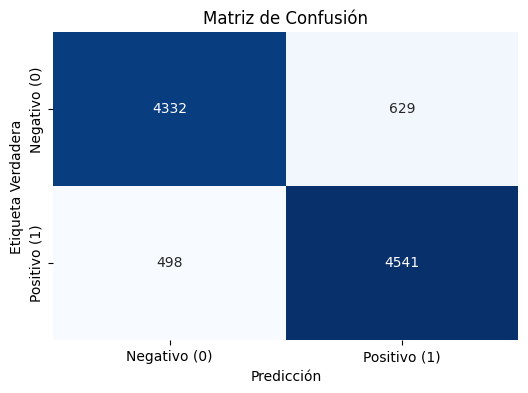

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()



In [ ]:
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 54.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Sin StopWords

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Llamadas a mostrar_arboles: 45013
Llamadas a mostrar_arboles: 45014
Llamadas a mostrar_arboles: 45015
Llamadas a mostrar_arboles: 45016
Llamadas a mostrar_arboles: 45017
Llamadas a mostrar_arboles: 45018
Llamadas a mostrar_arboles: 45019
Llamadas a mostrar_arboles: 45020
Llamadas a mostrar_arboles: 45021
Llamadas a mostrar_arboles: 45022
Llamadas a mostrar_arboles: 45023
Llamadas a mostrar_arboles: 45024
Llamadas a mostrar_arboles: 45025
Llamadas a mostrar_arboles: 45026
Llamadas a mostrar_arboles: 45027
Llamadas a mostrar_arboles: 45028
Llamadas a mostrar_arboles: 45029
Llamadas a mostrar_arboles: 45030
Llamadas a mostrar_arboles: 45031
Llamadas a mostrar_arboles: 45032
Llamadas a mostrar_arboles: 45033
Llamadas a mostrar_arboles: 45034
Llamadas a mostrar_arboles: 45035
Llamadas a mostrar_arboles: 45036
Llamadas a mostrar_arboles: 45037
Llamadas a mostrar_arboles: 45038
Llamadas a mostrar_arboles: 45039
Llamadas a most

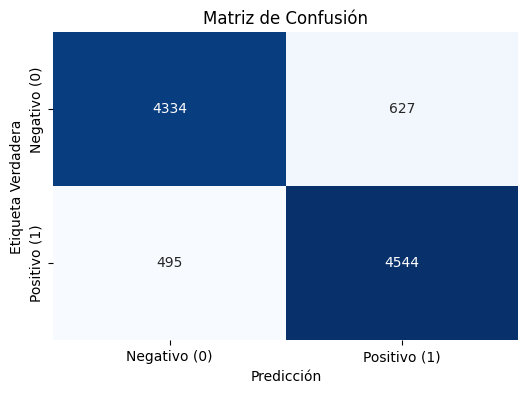

In [ ]:
# Importar las bibliotecas necesarias
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")
contador_llamadas = 0

def mostrar_arboles(text):
    global contador_llamadas
    """
    Muestra el árbol sintáctico de la frase original y luego el de la frase
    sin preposiciones, artículos, conjunciones y pronombres.

    Parámetros:
    - text (str): La frase de entrada.

    Retorno:
    - str: La frase sin preposiciones, artículos, conjunciones y pronombres.
    """
    # Analizar la frase original
    doc = nlp(text)

    # Filtrar palabras que no son preposiciones, artículos, conjunciones ni pronombres
    filtered_words = [
        token for token in doc
        if token.pos_ not in {"ADP", "DET", "CCONJ", "SCONJ", "PRON"}
    ]
    # Reconstruir la frase sin estas palabras
    filtered_sentence = " ".join([token.text for token in filtered_words])
    # Crear un nuevo Doc a partir de las palabras filtradas
    filtered_doc = nlp(filtered_sentence)
    contador_llamadas += 1
    print(f"Llamadas a mostrar_arboles: {contador_llamadas}")

    return filtered_sentence

# Preprocesar los datos de entrada utilizando la función mostrar_arboles
X_train = train_data['review_es'].apply(mostrar_arboles)
y_train = train_data['sentimiento']
X_test = test_data['review_es'].apply(mostrar_arboles)
y_test = test_data['sentimiento']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Llamadas a mostrar_arboles: 45013
Llamadas a mostrar_arboles: 45014
Llamadas a mostrar_arboles: 45015
Llamadas a mostrar_arboles: 45016
Llamadas a mostrar_arboles: 45017
Llamadas a mostrar_arboles: 45018
Llamadas a mostrar_arboles: 45019
Llamadas a mostrar_arboles: 45020
Llamadas a mostrar_arboles: 45021
Llamadas a mostrar_arboles: 45022
Llamadas a mostrar_arboles: 45023
Llamadas a mostrar_arboles: 45024
Llamadas a mostrar_arboles: 45025
Llamadas a mostrar_arboles: 45026
Llamadas a mostrar_arboles: 45027
Llamadas a mostrar_arboles: 45028
Llamadas a mostrar_arboles: 45029
Llamadas a mostrar_arboles: 45030
Llamadas a mostrar_arboles: 45031
Llamadas a mostrar_arboles: 45032
Llamadas a mostrar_arboles: 45033
Llamadas a mostrar_arboles: 45034
Llamadas a mostrar_arboles: 45035
Llamadas a mostrar_arboles: 45036
Llamadas a mostrar_arboles: 45037
Llamadas a mostrar_arboles: 45038
Llamadas a mostrar_arboles: 45039
Llamadas a most

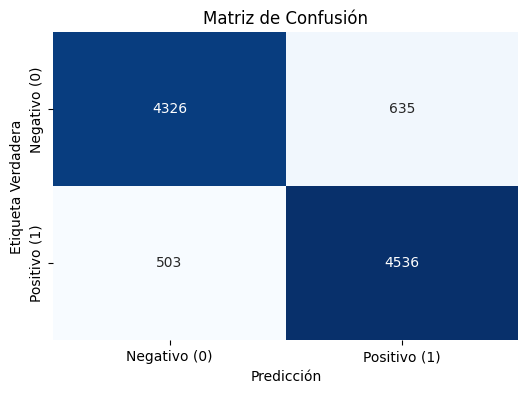

In [ ]:
# Importar las bibliotecas necesarias
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")
contador_llamadas = 0

def mostrar_arboles(text):
    global contador_llamadas
    """
    Muestra el árbol sintáctico de la frase original y luego el de la frase
    sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.

    Parámetros:
    - text (str): La frase de entrada.

    Retorno:
    - str: La frase sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.
    """
    # Analizar la frase original
    doc = nlp(text.lower())  # Convertir el texto a minúsculas desde el inicio

    # Filtrar palabras que no son preposiciones, artículos, conjunciones, pronombres, 'de' ni 'que'
    filtered_words = [
        token for token in doc
        if token.pos_ not in {"ADP", "DET", "CCONJ", "SCONJ", "PRON"} and token.text not in {"de", "que"}
    ]

    # Reconstruir la frase sin estas palabras
    filtered_sentence = " ".join([token.text for token in filtered_words])

    # Crear un nuevo Doc a partir de las palabras filtradas (aunque no es necesario crear otro Doc)
    filtered_doc = nlp(filtered_sentence)

    # Incrementar contador de llamadas
    contador_llamadas += 1
    print(f"Llamadas a mostrar_arboles: {contador_llamadas}")

    return filtered_sentence

# Preprocesar los datos de entrada utilizando la función mostrar_arboles
X_train = train_data['review_es'].apply(mostrar_arboles)
y_train = train_data['sentimiento']
X_test = test_data['review_es'].apply(mostrar_arboles)
y_test = test_data['sentimiento']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5253c59605e8872fb89fec20b29b60e1b319079199398617ab2bf5686f19f01d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Texto seleccionado para análisis:
Originalmente, yo era fanático de Tenacious D por su primer álbum y, naturalmente, escuché algunas canciones de The P.O.D., pero quedé bastante decepcionado. Después de ver la película, mi perspectiva cambió. La película es bastante divertida de principio a fin, y me encontré enganchado a pesar de que la trama era realmente absurda, gracias a las actitudes que KG y Jaybles retratan en la película. Mucho más entretenida y agradable que otras películas que he visto en el cine últimamente, como Saw III (aburrida y lenta) o Casino Royale (demasiado homoerótica), aunque he disfrutado mucho entregas anteriores. Si disfrutaste Borat, seguramente disfrutarás la historia de The Greatest Band on Earth.

Palabras más importantes para la predicción:
aburrida: -0.14
entretenida: 0.09
agradable: 0.08
divertida: 0.07
gracias: 0.07



La explicación se ha guardado como 'lime_explanation.html'.


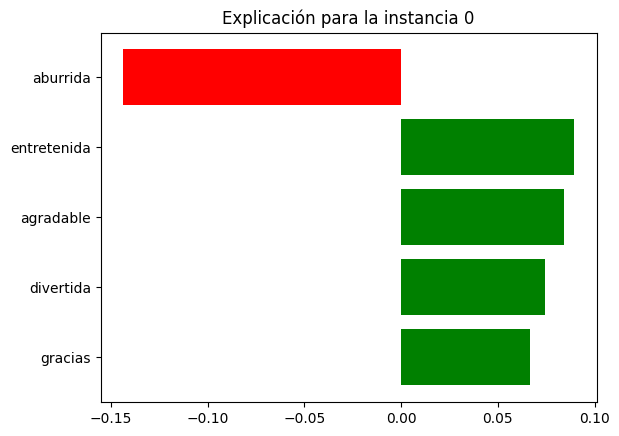

In [ ]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Paso 1: Configurar el explicador de LIME
explainer = LimeTextExplainer(class_names=["Negativo", "Positivo"])  # Ajusta según tus clases

# Paso 2: Seleccionar una instancia de prueba para analizar
idx = 0  # Cambia el índice según el texto que quieras analizar
sample_text =  "Originalmente, yo era fanático de Tenacious D por su primer álbum y, naturalmente, escuché algunas canciones de The P.O.D., pero quedé bastante decepcionado. Después de ver la película, mi perspectiva cambió. La película es bastante divertida de principio a fin, y me encontré enganchado a pesar de que la trama era realmente absurda, gracias a las actitudes que KG y Jaybles retratan en la película. Mucho más entretenida y agradable que otras películas que he visto en el cine últimamente, como Saw III (aburrida y lenta) o Casino Royale (demasiado homoerótica), aunque he disfrutado mucho entregas anteriores. Si disfrutaste Borat, seguramente disfrutarás la historia de The Greatest Band on Earth." # Suponiendo que X_test es un DataFrame o Series

print("Texto seleccionado para análisis:")
print(sample_text)

# Paso 3: Crear una función de predicción para LIME
def predict_proba_lime(texts):
    transformed_texts = tfidf_vectorizer.transform(texts)
    return logistic_regression_model.predict_proba(transformed_texts)



# Paso 4: Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    sample_text,
    predict_proba_lime,
    num_features=5  # Número de palabras más importantes
)

# Paso 5: Mostrar resultados de la explicación
print("\nPalabras más importantes para la predicción:")
for word, weight in exp.as_list():
    print(f"{word}: {weight:.2f}")

# Paso 6: Visualización de la explicación
exp.show_in_notebook(text=True)  # Muestra una visualización en Jupyter Notebook

# (Opcional) Guardar la explicación en HTML para compartir
exp.save_to_file("lime_explanation.html")
print("\nLa explicación se ha guardado como 'lime_explanation.html'.")

# Paso 7: Gráfica de las palabras más importantes (opcional)
fig = exp.as_pyplot_figure()
plt.title(f"Explicación para la instancia {idx}")
plt.show()


In [ ]:
def analyze_word_importance_lime(text):
    # Obtener la predicción de la probabilidad del texto original
    original_probs = predict_proba_lime([text])[0]
    original_class = np.argmax(original_probs)
    print(f"Texto original: '{text}'")
    print(f"Predicción original: Clase {original_class}, Probabilidades {original_probs}")

    # Tokenizar el texto en palabras individuales
    tokens = text.split()
    word_importance = []

    # Perturbar el texto eliminando una palabra a la vez
    for i, token in enumerate(tokens):
        # Crear un texto nuevo sin el token actual
        perturbed_tokens = tokens[:i] + tokens[i+1:]
        perturbed_text = " ".join(perturbed_tokens)

        # Obtener la predicción del texto perturbado
        perturbed_probs = predict_proba_lime([perturbed_text])[0]
        perturbed_class = np.argmax(perturbed_probs)

        # Calcular el cambio en la probabilidad para la clase original
        prob_change = original_probs[original_class] - perturbed_probs[original_class]
        # Guardar el resultado
        word_importance.append((token, prob_change, perturbed_class))
        print(f"Sin '{token}': Clase {perturbed_class}, Probabilidades {perturbed_probs}, Cambio en probabilidad de clase original: {prob_change}")

    # Ordenar las palabras por importancia en la probabilidad de la clase original
    word_importance = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)
    print("\nPalabras ordenadas por impacto en la predicción de la clase original:")
    for token, change, new_class in word_importance:
        print(f"Palabra '{token}': Cambio en probabilidad de clase original {change:.4f}, Nueva clase: {new_class}")

# Ejemplo de uso
text_example = "Originalmente yo era fanático de Tenacious D por su primer álbum y escuché algunas canciones pero quedé bastante decepcionado."
analyze_word_importance_lime(text_example)

Texto original: 'Originalmente yo era fanático de Tenacious D por su primer álbum y escuché algunas canciones pero quedé bastante decepcionado.'
Predicción original: Clase 0, Probabilidades [0.56865701 0.43134299]
Sin 'Originalmente': Clase 0, Probabilidades [0.63297476 0.36702524], Cambio en probabilidad de clase original: -0.06431774363662834
Sin 'yo': Clase 0, Probabilidades [0.53787821 0.46212179], Cambio en probabilidad de clase original: 0.0307788038261686
Sin 'era': Clase 0, Probabilidades [0.53917868 0.46082132], Cambio en probabilidad de clase original: 0.02947833007286982
Sin 'fanático': Clase 0, Probabilidades [0.5762657 0.4237343], Cambio en probabilidad de clase original: -0.007608690242863592
Sin 'de': Clase 0, Probabilidades [0.54661877 0.45338123], Cambio en probabilidad de clase original: 0.02203824060533388
Sin 'Tenacious': Clase 0, Probabilidades [0.57750787 0.42249213], Cambio en probabilidad de clase original: -0.008850850347790873
Sin 'D': Clase 0, Probabilidades 

In [ ]:
# Crear una lista de nombres de variables originales del DataFrame de entrenamiento
original_variables = tfidf_vectorizer.get_feature_names_out()

# Extraer los coeficientes del estimador de regresión logística
model_coefficients = logistic_regression_model.coef_[0]

# Crear un DataFrame de las variables y coeficientes
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})

# Guardar el DataFrame como un archivo CSV
coefficient_df.to_csv('coefficients.csv', index=False)

# Imprimir las tres variables más positivas
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[:3]
print("\nTop 3 Positive Variables:")
print(top_three_df)


Top 3 Positive Variables:
        Variable  Coefficient
56639  excelente     8.431597
50619    encantó     5.248640
66959       gran     4.598226


In [ ]:
import pandas as pd

# Crear una lista de nombres de variables originales del DataFrame de entrenamiento
original_variables = tfidf_vectorizer.get_feature_names_out()

# Extraer los coeficientes del estimador de regresión logística
model_coefficients = logistic_regression_model.coef_[0]

# Crear un DataFrame de las variables y coeficientes
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})

# Guardar el DataFrame como un archivo CSV
coefficient_df.to_csv('coefficients.csv', index=False)

# Imprimir las tres variables más positivas
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[:3]
print("\nTop 3 Positive Variables:")
print(top_three_df)
"""
# Acceder a la variable con el coeficiente más alto (más positiva)
most_positive = coefficient_df.loc[coefficient_df['Coefficient'].idxmax()]
print(f"\nLa variable más positiva es: {most_positive['Variable']} con coeficiente {most_positive['Coefficient']}")

# Acceder a la variable con el coeficiente más bajo (más negativa)
most_negative = coefficient_df.loc[coefficient_df['Coefficient'].idxmin()]
print(f"\nLa variable más negativa es: {most_negative['Variable']} con coeficiente {most_negative['Coefficient']}")
"""
# Acceder a una variable específica por nombre (ejemplo con 'palabra_clave')
variable_name = 'Originalmente, yo era fanático de Tenacious D por su primer álbum y, naturalmente, escuché algunas canciones de The P.O.D., pero quedé bastante decepcionado. Después de ver la película, mi perspectiva cambió. La película es bastante divertida de principio a fin, y me encontré enganchado a pesar de que la trama era realmente absurda, gracias a las actitudes que KG y Jaybles retratan en la película. Mucho más entretenida y agradable que otras películas que he visto en el cine últimamente, como Saw III (aburrida y lenta) o Casino Royale (demasiado homoerótica), aunque he disfrutado mucho entregas anteriores. Si disfrutaste Borat, seguramente disfrutarás la historia de The Greatest Band on Earth.'  # Reemplaza con la palabra o frase que quieras buscar
selected_variable = coefficient_df[coefficient_df['Variable'] == variable_name]
print(f"\nDetalles de la variable '{variable_name}':")
print(selected_variable)



Top 3 Positive Variables:
        Variable  Coefficient
56639  excelente     8.431597
50619    encantó     5.248640
66959       gran     4.598226

Detalles de la variable 'Originalmente, yo era fanático de Tenacious D por su primer álbum y, naturalmente, escuché algunas canciones de The P.O.D., pero quedé bastante decepcionado. Después de ver la película, mi perspectiva cambió. La película es bastante divertida de principio a fin, y me encontré enganchado a pesar de que la trama era realmente absurda, gracias a las actitudes que KG y Jaybles retratan en la película. Mucho más entretenida y agradable que otras películas que he visto en el cine últimamente, como Saw III (aburrida y lenta) o Casino Royale (demasiado homoerótica), aunque he disfrutado mucho entregas anteriores. Si disfrutaste Borat, seguramente disfrutarás la historia de The Greatest Band on Earth.':
Empty DataFrame
Columns: [Variable, Coefficient]
Index: []


In [ ]:
# Obtener el top 20 de variables positivas
top_positive_variables = coefficient_df.nlargest(20, "Coefficient")

# Obtener el top 20 de variables negativas
top_negative_variables = coefficient_df.nsmallest(20, "Coefficient")

# Imprimir los resultados
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)



Top 20 Positive Variables:
               Variable  Coefficient
56639         excelente     8.431597
50619           encantó     5.248640
66959              gran     4.598226
93783           mejores     4.549444
91708       maravillosa     4.510990
44553          disfruté     4.508573
64896            genial     4.481421
20401         brillante     4.473350
38590   definitivamente     4.385052
140787          también     4.277483
73076               hoy     4.269621
119264       recomiendo     4.239961
76187         increíble     4.230561
108398         perfecto     4.210438
56645        excelentes     4.089029
17600              bien     3.718930
4950          agradable     3.718411
108387    perfectamente     3.716598
135129       sorprendió     3.688203
91711       maravilloso     3.634521

Top 20 Negative Variables:
                  Variable  Coefficient
108081                peor   -10.531231
72723             horrible    -9.279187
142398            terrible    -7.585207
90515  

In [ ]:
# Crear listas de variables con coeficientes positivos y negativos
positive_variables = coefficient_df[coefficient_df["Coefficient"] > 0]["Variable"].tolist()
negative_variables = coefficient_df[coefficient_df["Coefficient"] < 0]["Variable"].tolist()

# Imprimir las listas
print("\nPositive Variables:")
print(positive_variables)

print("\nNegative Variables:")
print(negative_variables)



Positive Variables:
['000m2', '000mill', '00h', '02', '03', '05', '091', '09twbdvm', '0ajjkxo8', '0eadvkcy', '0ey5v8di', '0f7jzns8espero', '0khictfn', '0l0hzkdb', '0leyuwcl', '0luyjjrm', '0m6vgw2i', '0mgit1ow', '0q6xyejm', '0umobsyt', '0z3f9o7u', '10', '100', '1000', '10000', '100000', '1000maneras', '100x100', '110', '110añosdeleyenda', '12', '12h', '13', '1391', '14', '14000', '14000000', '14xstmmv', '15000', '150000', '154', '16', '162', '17congresopp', '1812', '187', '19', '1927', '1972', '1988', '1992', '1997', '19f', '1a', '1ac2ind8', '1billboards', '1cbjztf9', '1cvvjhwh', '1gyscglv', '1h7z360u', '1ilusión', '1s8hona5', '1sauna', '1stykcoa', '1tapon', '1we9mple', '1y5svfbk', '200', '200000', '2003', '2010misterchip', '2012_lapepa', '2013', '20h', '20kcigav', '21', '210000', '22', '22h', '23', '23h', '23kqopkm', '24', '24h_tve', '24horas_rne', '25njdsdl', '26', '267000', '27300', '27zogei6', '28', '28028', '28f', '29', '2br6ywhc', '2eqygtj4', '2gaiu1jy', '2gsww7gw', '2l5mzp25', '

In [ ]:
# Ordenar el DataFrame por el valor absoluto de los coeficientes
coefficient_df_sorted = coefficient_df.copy()
coefficient_df_sorted['Abs_Coefficient'] = abs(coefficient_df_sorted['Coefficient'])
coefficient_df_sorted = coefficient_df_sorted.sort_values(by='Abs_Coefficient', ascending=False)

# Obtener el top 20 de variables con coeficientes positivos y negativos
top_positive_variables = coefficient_df_sorted[coefficient_df_sorted["Coefficient"] > 0]["Variable"].head(20).tolist()
top_negative_variables = coefficient_df_sorted[coefficient_df_sorted["Coefficient"] < 0]["Variable"].head(20).tolist()

# Imprimir las listas
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)



Top 20 Positive Variables:
['gracias', 'buen', 'feliz', 'noche', 'enhorabuena', 'ff', 'gracia', 'alejandrosanz', 'encantar', 'rt', 'cont', 'felicidad', 'beso', 'equipo', 'nuevo', 'bueno', 'mejor', 'amigo', 'mucho', 'bien']

Top 20 Negative Variables:
['déficit', 'recorte', 'pagar', 'caso', 'huelga', 'denunciar', 'psoe', 'ministro', 'muerto', 'rajoy', 'eta', 'cosa', 'junta', 'impuesto', 'corrupción', 'presupuesto', 'euros', 'españa', 'deuda', 'crisis']


##Codigo para SENTIMENTS

In [ ]:

# Convertir las columnas 'Review' a cadenas
X_train = train_data['text'].astype(str)
X_test = test_data['text'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment']
y_test = test_data['sentiment']


# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [ ]:
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))



Accuracy: 0.7694300518134715

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       219
           1       0.93      0.50      0.65       167

    accuracy                           0.77       386
   macro avg       0.83      0.74      0.74       386
weighted avg       0.81      0.77      0.75       386



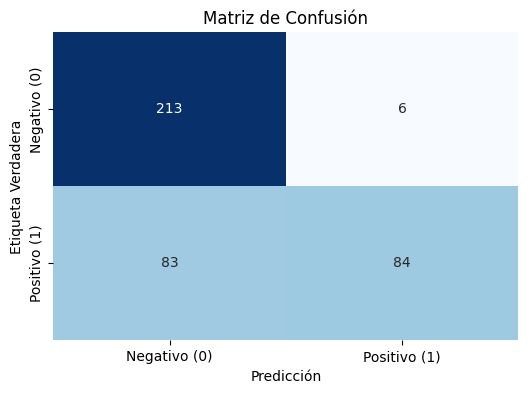

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Definir los parámetros a explorar para la regresión logística
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el GridSearchCV para la regresión logística
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Mejores parámetros: {'C': 100}
Accuracy: 0.8860103626943006

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       219
           1       0.91      0.81      0.86       167

    accuracy                           0.89       386
   macro avg       0.89      0.88      0.88       386
weighted avg       0.89      0.89      0.89       386



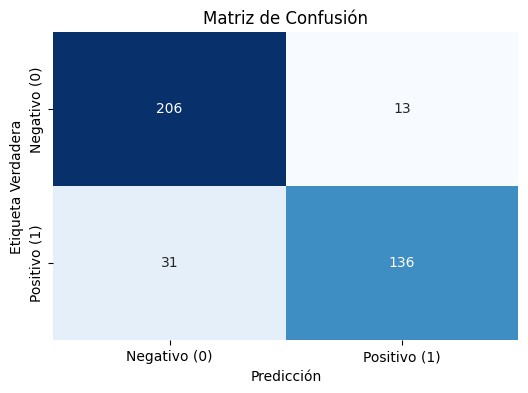

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Definir los parámetros a explorar para la regresión logística
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Inicializar el GridSearchCV para la regresión logística
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    scoring='accuracy'
)

# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
print("\nClassification Report:")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Mejores parámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       219
           1       0.96      0.93      0.95       167

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


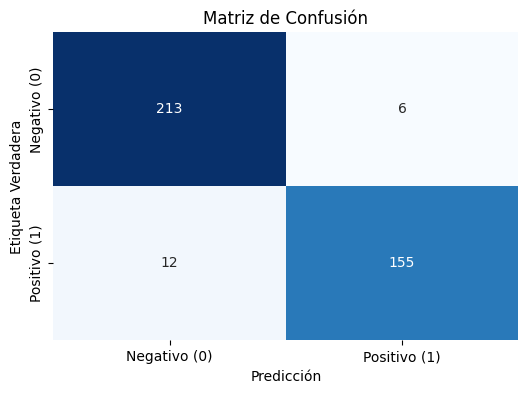

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Reducir el tamaño del conjunto de datos de entrenamiento
X_train_small, _, y_train_small, _ = train_test_split(X_train_tfidf, y_train, test_size=0.1, random_state=42)

# Definir los parámetros a explorar para la regresión logística
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Inicializar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Ejecutar la búsqueda aleatoria en el conjunto de datos de entrenamiento reducido
random_search.fit(X_train_small, y_train_small)

# Obtener los mejores parámetros
print("Mejores parámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Entrenar el mejor modelo en todo el conjunto de datos de entrenamiento
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
print("\nClassification Report:")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mejores parámetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       219
           1       0.96      0.93      0.95       167

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


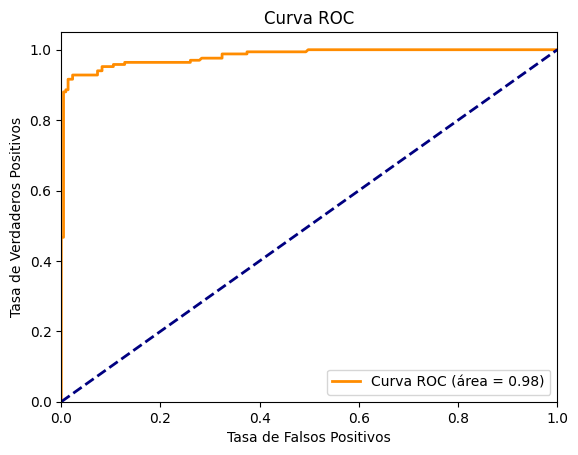

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para el conjunto de prueba
y_pred_proba = best_model.predict_proba(X_test_tfidf)[:, 1]

# Calcular las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


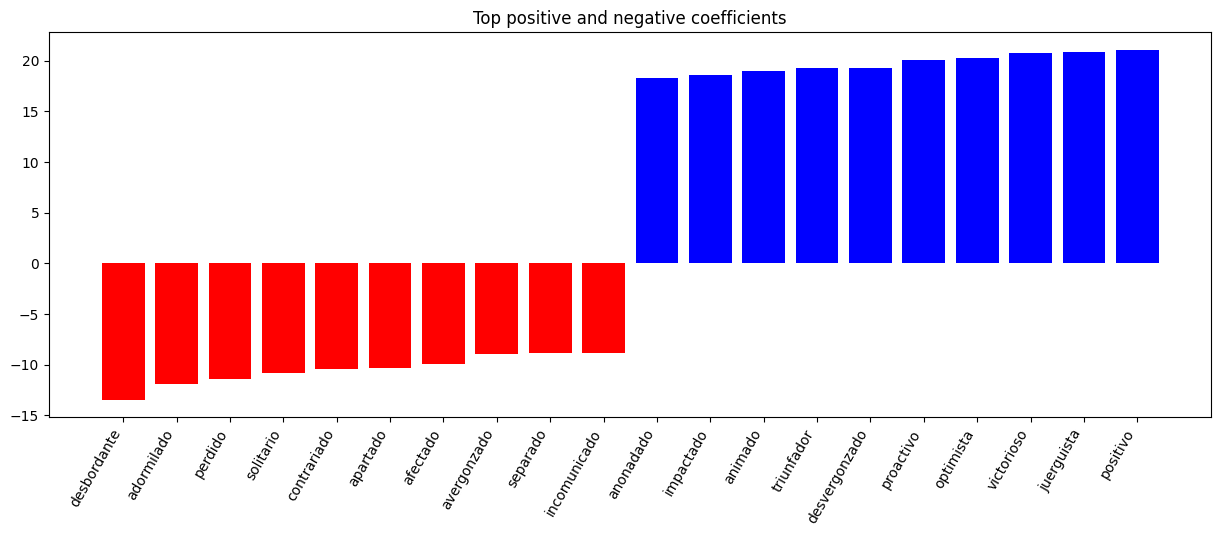

In [ ]:
import numpy as np

# Supongamos que tfidf_vectorizer es tu vectorizador de TF-IDF ya ajustado
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = best_model.coef_.flatten()

# Ordenar las palabras por la magnitud de sus coeficientes
top_positive_coefficients = np.argsort(coefficients)[-10:]
top_negative_coefficients = np.argsort(coefficients)[:10]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# Graficar las palabras más influyentes
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.arange(2 * 10), coefficients[top_coefficients], color=colors)
plt.xticks(np.arange(2 * 10), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Top positive and negative coefficients')
plt.show()


Codigo nuevo

Frase seleccionada: 👉🏻 El truco está en hacer las cosas aún cuando no te sientes motivado. Eso es lo que hace la diferencia.
Etiqueta verdadera: 1
Predicción: 1
Probabilidades: [[0.4853177 0.5146823]]
Palabras en la frase y sus coeficientes:
aún: -0.039998304241793146
cosas: 0.3328504682865052
cuando: 0.43938052437889985
diferencia: -0.244967198724496
el: 0.6624981046375796
en: 1.0503246535798436
es: 0.5169159744648317
eso: 0.11930992964990299
está: -0.8457338125647993
hace: -0.10807674907674114
hacer: 0.06923536724414006
la: 0.6204058581637794
las: 0.42508326969482596
lo: 0.2737621472688543
motivado: 0.840434242981945
no: -0.642390732350429
que: -0.15421462972406125
sientes: -0.009473065454723626
te: -0.0376116353877409


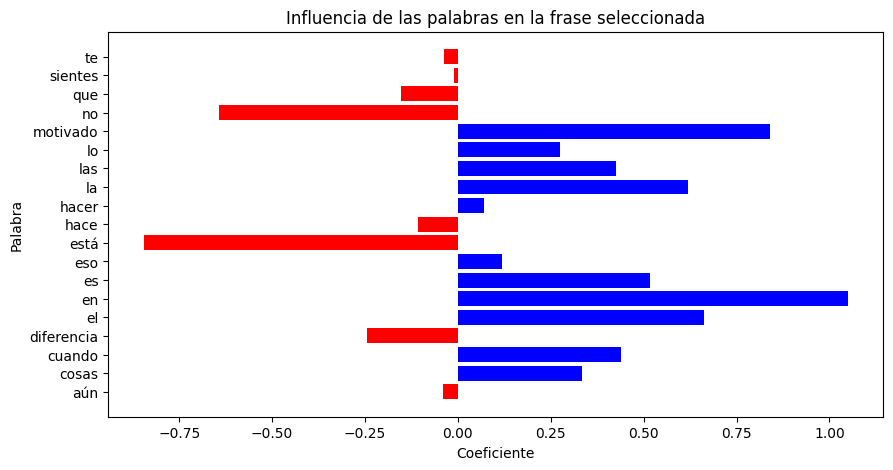

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Convertir las columnas 'text' a cadenas
X_train = train_data['text'].astype(str)
X_test = test_data['text'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Seleccionar un índice al azar del conjunto de datos de prueba
random_index = np.random.choice(X_test.index)
random_phrase = X_test[random_index]
random_label = y_test[random_index]

print(f"Frase seleccionada: {random_phrase}")
print(f"Etiqueta verdadera: {random_label}")

# Vectorizar la frase seleccionada
random_phrase_tfidf = tfidf_vectorizer.transform([random_phrase])

# Obtener la predicción del modelo
prediction = logistic_regression_model.predict(random_phrase_tfidf)
prediction_proba = logistic_regression_model.predict_proba(random_phrase_tfidf)

print(f"Predicción: {prediction[0]}")
print(f"Probabilidades: {prediction_proba}")

# Obtener los coeficientes del modelo
coefficients = logistic_regression_model.coef_.flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extraer las palabras presentes en la frase y sus coeficientes
phrase_features = random_phrase_tfidf.toarray().flatten()
important_features = {feature_names[i]: coefficients[i] for i in range(len(phrase_features)) if phrase_features[i] != 0}

print("Palabras en la frase y sus coeficientes:")
for word, coef in important_features.items():
    print(f"{word}: {coef}")

# Graficar las palabras y sus coeficientes
words = list(important_features.keys())
coefs = list(important_features.values())
colors = ['red' if coef < 0 else 'blue' for coef in coefs]

plt.figure(figsize=(10, 5))
plt.barh(words, coefs, color=colors)
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Influencia de las palabras en la frase seleccionada')
plt.show()


Frase seleccionada: Voy a ver a los warriors con toda la ilusión pero se que terminare desilusionado
Etiqueta verdadera: 0
Predicción: 0
Probabilidades: [[0.60450779 0.39549221]]
Palabras en la frase y sus coeficientes:
con: 0.6904247769198916
desilusionado: -0.690084019469884
ilusión: -0.16963248182840496
la: 0.6204058581637794
los: 0.7293366240485828
pero: 0.09074566273685367
que: -0.15421462972406125
se: -0.6603965136948972
terminare: -0.08740965466572936
toda: 0.33329533944248246
ver: 0.5879653441571693
voy: -0.1467478891429582


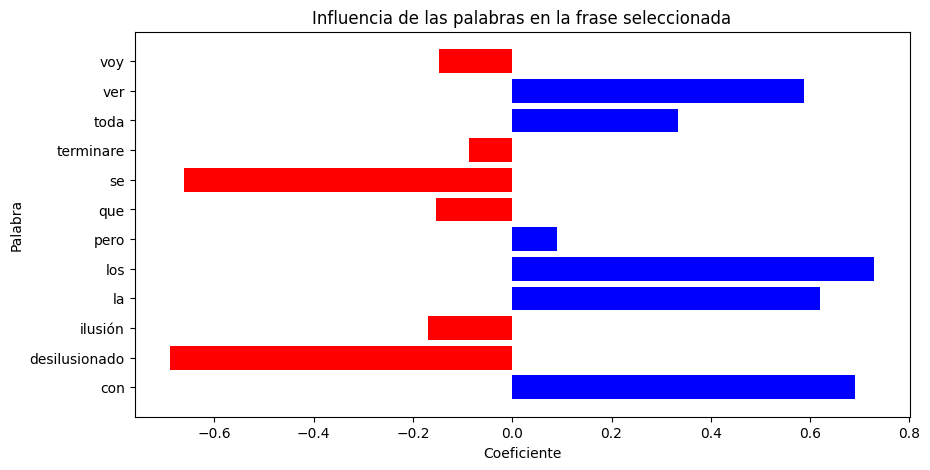

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Convertir las columnas 'text' a cadenas
X_train = train_data['text'].astype(str)
X_test = test_data['text'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Seleccionar un índice al azar del conjunto de datos de prueba
random_index = np.random.choice(X_test.index)
random_phrase = X_test[random_index]
random_label = y_test[random_index]

print(f"Frase seleccionada: {random_phrase}")
print(f"Etiqueta verdadera: {random_label}")

# Vectorizar la frase seleccionada
random_phrase_tfidf = tfidf_vectorizer.transform([random_phrase])

# Obtener la predicción del modelo
prediction = logistic_regression_model.predict(random_phrase_tfidf)
prediction_proba = logistic_regression_model.predict_proba(random_phrase_tfidf)

print(f"Predicción: {prediction[0]}")
print(f"Probabilidades: {prediction_proba}")

# Obtener los coeficientes del modelo
coefficients = logistic_regression_model.coef_.flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extraer las palabras presentes en la frase y sus coeficientes
phrase_features = random_phrase_tfidf.toarray().flatten()
important_features = {feature_names[i]: coefficients[i] for i in range(len(phrase_features)) if phrase_features[i] != 0}

print("Palabras en la frase y sus coeficientes:")
for word, coef in important_features.items():
    print(f"{word}: {coef}")

# Graficar las palabras y sus coeficientes
words = list(important_features.keys())
coefs = list(important_features.values())
colors = ['red' if coef < 0 else 'blue' for coef in coefs]

plt.figure(figsize=(10, 5))
plt.barh(words, coefs, color=colors)
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Influencia de las palabras en la frase seleccionada')
plt.show()


Frase seleccionada: ADVERTENCIA: Los spoilers, querido Roger. Durante tu distinguida carrera, has hecho una amplia gama de entretenimiento, algunos buenos, algunos malos. La noche de la bestia de la sangre cae en la última categoría. No es tan poco frecuente como, digamos, El fantasma de 10,000 leguas o, tal vez, El horror de Dunwich. No obstante, una de mis mayores críticas a esta película es que podría haberse hecho más rápida, mejor y más barata. Al comienzo de los títulos, Roger, las secuencias de cohetes se parecen a algo del Hombre al espacio de Disney, no tan bueno, por supuesto. El cohete futurista parece nada en comparación con el contemporáneo de 1958. ¿Por qué no usaste una vanguardia, Atlas o incluso un lanzamiento de vikingo? Mejor aún, ¿por qué no prescindir completamente del lanzamiento y comenzar con una toma del espacio y la cápsula flotando en él? Eso es lo que habría hecho por ti, Roger. En segundo lugar, ¿por qué hacer que la nave espacial se estrelle al reingresar?

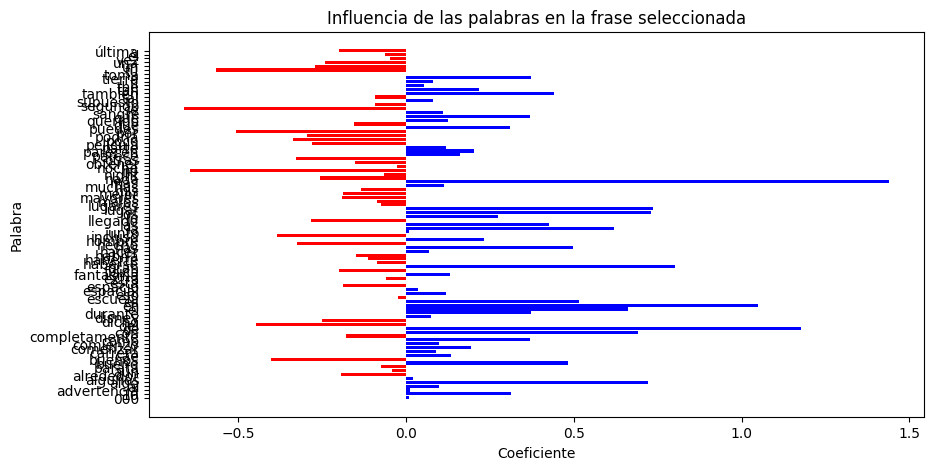

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Convertir las columnas 'text' a cadenas
X_train = train_data['text'].astype(str)
X_test = test_data['text'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Frase específica para analizar
specific_phrase = "ADVERTENCIA: Los spoilers, querido Roger. Durante tu distinguida carrera, has hecho una amplia gama de entretenimiento, algunos buenos, algunos malos. La noche de la bestia de la sangre cae en la última categoría. No es tan poco frecuente como, digamos, El fantasma de 10,000 leguas o, tal vez, El horror de Dunwich. No obstante, una de mis mayores críticas a esta película es que podría haberse hecho más rápida, mejor y más barata. Al comienzo de los títulos, Roger, las secuencias de cohetes se parecen a algo del Hombre al espacio de Disney, no tan bueno, por supuesto. El cohete futurista parece nada en comparación con el contemporáneo de 1958. ¿Por qué no usaste una vanguardia, Atlas o incluso un lanzamiento de vikingo? Mejor aún, ¿por qué no prescindir completamente del lanzamiento y comenzar con una toma del espacio y la cápsula flotando en él? Eso es lo que habría hecho por ti, Roger. En segundo lugar, ¿por qué hacer que la nave espacial se estrelle al reingresar? Incluso un estudiante de física de la escuela intermedia podría haberte dicho que tu astronauta habría llegado a la Tierra extra crujiente y en gran parte deshuesado.  También puedes obtener Night of the Blood Beast, junto con muchas otras terriblesbles películas de horror/sci-fi en lugares como BestBuy por alrededor de $6."
print(f"Frase seleccionada: {specific_phrase}")

# Vectorizar la frase seleccionada
specific_phrase_tfidf = tfidf_vectorizer.transform([specific_phrase])

# Obtener la predicción del modelo
prediction = logistic_regression_model.predict(specific_phrase_tfidf)
prediction_proba = logistic_regression_model.predict_proba(specific_phrase_tfidf)

print(f"Predicción: {prediction[0]}")
print(f"Probabilidades: {prediction_proba}")

# Obtener los coeficientes del modelo
coefficients = logistic_regression_model.coef_.flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extraer las palabras presentes en la frase y sus coeficientes
phrase_features = specific_phrase_tfidf.toarray().flatten()
important_features = {feature_names[i]: coefficients[i] for i in range(len(phrase_features)) if phrase_features[i] != 0}

print("Palabras en la frase y sus coeficientes:")
for word, coef in important_features.items():
    print(f"{word}: {coef}")

# Graficar las palabras y sus coeficientes
words = list(important_features.keys())
coefs = list(important_features.values())
colors = ['red' if coef < 0 else 'blue' for coef in coefs]

plt.figure(figsize=(10, 5))
plt.barh(words, coefs, color=colors)
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Influencia de las palabras en la frase seleccionada')
plt.show()


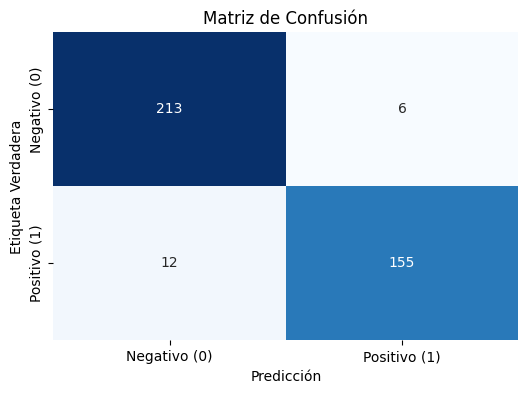

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Reducir el tamaño del conjunto de datos de entrenamiento
X_train_small, _, y_train_small, _ = train_test_split(X_train_tfidf, y_train, test_size=0.1, random_state=42)

# Definir los parámetros a explorar para la regresión logística
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Inicializar GridSearchCV para la regresión logística
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda en el conjunto de datos de entrenamiento reducido
grid_search.fit(X_train_small, y_train_small)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo en todo el conjunto de datos de entrenamiento
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Mejores parámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       219
           1       0.96      0.93      0.95       167

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Crear una lista de nombres de variables originales del DataFrame de entrenamiento
original_variables = tfidf_vectorizer.get_feature_names_out()

# Extraer los coeficientes del estimador de regresión logística
model_coefficients = logistic_regression_model.coef_[0]

# Crear un DataFrame de las variables y coeficientes
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})

# Obtener el top 20 de variables positivas
top_positive_variables = coefficient_df.nlargest(20, "Coefficient")

# Obtener el top 20 de variables negativas
top_negative_variables = coefficient_df.nsmallest(20, "Coefficient")

# Imprimir los resultados
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)


Top 3 Positive Variables:
      Variable  Coefficient
5635  positivo     1.710739
478    animado     1.643337
4824       más     1.438629


In [ ]:
# Obtener el top 20 de variables positivas
top_positive_variables = coefficient_df.nlargest(20, "Coefficient")

# Obtener el top 20 de variables negativas
top_negative_variables = coefficient_df.nsmallest(20, "Coefficient")

# Imprimir los resultados
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)


Top 20 Positive Variables:
           Variable  Coefficient
5635       positivo     1.710739
478         animado     1.643337
4824            más     1.438629
483       anonadado     1.385078
7261       valiente     1.356571
4633          miedo     1.302984
5099      optimista     1.266111
974        bromista     1.220997
6187       resuelto     1.193069
3341       gracioso     1.192045
1959             de     1.176473
4313        logrado     1.164287
3772      incrédulo     1.157560
6415  satisfactorio     1.152175
717           audaz     1.133278
1548       confiado     1.088089
3086        festivo     1.081334
7109      travesura     1.062508
1124          capaz     1.061618
711        atrevido     1.059554

Top 20 Negative Variables:
         Variable  Coefficient
1108      cansado    -1.694399
6661    solitario    -1.527692
140      abrumado    -1.427314
5388      perdido    -1.356712
2125   desbordado    -1.116361
6712          soy    -1.104855
3215      furioso    -1.097313
341

In [ ]:
#Programa para quietar las StopWords
# Importar las bibliotecas necesarias
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")
contador_llamadas = 0

def mostrar_arboles(text):
    global contador_llamadas
    """
    Muestra el árbol sintáctico de la frase original y luego el de la frase
    sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.

    Parámetros:
    - text (str): La frase de entrada.

    Retorno:
    - str: La frase sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.
    """
    # Analizar la frase original
    doc = nlp(text.lower())  # Convertir el texto a minúsculas desde el inicio

    # Filtrar palabras que no son preposiciones, artículos, conjunciones, pronombres, 'de' ni 'que'
    filtered_words = [
        token for token in doc
        if token.pos_ not in {"ADP", "DET", "CCONJ", "SCONJ", "PRON"} and token.text not in {"de", "que"}
    ]

    # Reconstruir la frase sin estas palabras
    filtered_sentence = " ".join([token.text for token in filtered_words])

    # Crear un nuevo Doc a partir de las palabras filtradas (aunque no es necesario crear otro Doc)
    filtered_doc = nlp(filtered_sentence)

    # Incrementar contador de llamadas
    contador_llamadas += 1
    print(f"Llamadas a mostrar_arboles: {contador_llamadas}")

    return filtered_sentence

# Convertir las columnas 'text' a cadenas
X_train = train_data['text'].astype(str)
X_test = test_data['text'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
#Aplicacion del modelo LIME
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Paso 1: Configurar el explicador de LIME
explainer = LimeTextExplainer(class_names=["Negativo", "Positivo"])  # Ajusta según tus clases

# Paso 2: Seleccionar una instancia de prueba para analizar
idx = 0  # Cambia el índice según el texto que quieras analizar

print("Texto seleccionado para análisis:")
print(sample_text)

# Paso 3: Crear una función de predicción para LIME
def predict_proba_lime(texts):
    transformed_texts = tfidf_vectorizer.transform(texts)
    return logistic_regression_model.predict_proba(transformed_texts)



# Paso 4: Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    sample_text,
    predict_proba_lime,
    num_features=5  # Número de palabras más importantes
)

# Paso 5: Mostrar resultados de la explicación
print("\nPalabras más importantes para la predicción:")
for word, weight in exp.as_list():
    print(f"{word}: {weight:.2f}")

# Paso 6: Visualización de la explicación
exp.show_in_notebook(text=True)  # Muestra una visualización en Jupyter Notebook

# (Opcional) Guardar la explicación en HTML para compartir
exp.save_to_file("lime_explanation.html")
print("\nLa explicación se ha guardado como 'lime_explanation.html'.")

# Paso 7: Gráfica de las palabras más importantes (opcional)
fig = exp.as_pyplot_figure()
plt.title(f"Explicación para la instancia {idx}")
plt.show()

In [ ]:
#Aplicacion de nuestro modelo de explicabilidad
def analyze_word_importance_lime(text):
    # Obtener la predicción de la probabilidad del texto original
    original_probs = predict_proba_lime([text])[0]
    original_class = np.argmax(original_probs)
    print(f"Texto original: '{text}'")
    print(f"Predicción original: Clase {original_class}, Probabilidades {original_probs}")

    # Tokenizar el texto en palabras individuales
    tokens = text.split()
    word_importance = []

    # Perturbar el texto eliminando una palabra a la vez
    for i, token in enumerate(tokens):
        # Crear un texto nuevo sin el token actual
        perturbed_tokens = tokens[:i] + tokens[i+1:]
        perturbed_text = " ".join(perturbed_tokens)

        # Obtener la predicción del texto perturbado
        perturbed_probs = predict_proba_lime([perturbed_text])[0]
        perturbed_class = np.argmax(perturbed_probs)

        # Calcular el cambio en la probabilidad para la clase original
        prob_change = original_probs[original_class] - perturbed_probs[original_class]
        # Guardar el resultado
        word_importance.append((token, prob_change, perturbed_class))
        print(f"Sin '{token}': Clase {perturbed_class}, Probabilidades {perturbed_probs}, Cambio en probabilidad de clase original: {prob_change}")

    # Ordenar las palabras por importancia en la probabilidad de la clase original
    word_importance = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)
    print("\nPalabras ordenadas por impacto en la predicción de la clase original:")
    for token, change, new_class in word_importance:
        print(f"Palabra '{token}': Cambio en probabilidad de clase original {change:.4f}, Nueva clase: {new_class}")

# Ejemplo de uso
text_example = "Originalmente yo era fanático de Tenacious D por su primer álbum y escuché algunas canciones pero quedé bastante decepcionado."
analyze_word_importance_lime(text_example)

##Codigo para Rest_mex

In [ ]:
# Convertir las columnas 'Review' a cadenas
X_train = train_data['Review'].astype(str)
X_test = test_data['Review'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['Polarity']
y_test = test_data['Polarity']


# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9730710715061943

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.59      0.71      2541
         1.0       0.98      1.00      0.99     43469

    accuracy                           0.97     46010
   macro avg       0.93      0.79      0.85     46010
weighted avg       0.97      0.97      0.97     46010



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Suponiendo que ya tienes tus datos de entrenamiento X_train, y_train
# y tus datos de prueba X_test, y_test

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Obtener los coeficientes del modelo
coeficientes = logistic_regression_model.coef_[0]

# Obtener los términos (palabras) correspondientes a los coeficientes
features = tfidf_vectorizer.get_feature_names_out()

# Crear un DataFrame para visualizar los coeficientes junto con los términos
coef_df = pd.DataFrame({'Término': features, 'Coeficiente': coeficientes})

# Ordenar los términos por coeficiente (de mayor a menor)
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Imprimir los términos con los coeficientes más altos y más bajos
print("Top términos positivos:")
print(coef_df.head(10))
print("\nTop términos negativos:")
print(coef_df.tail(10))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top términos positivos:
          Término  Coeficiente
45339   excelente    13.167461
57664   increíble     6.044484
40378     encantó     5.906903
17491        buen     5.887449
51637     gracias     5.280440
37873        duda     5.233763
32468   delicioso     5.214588
72217         muy     5.152563
45362  excelentes     4.681763
32451   deliciosa     4.597055

Top términos negativos:
          Término  Coeficiente
31660   decepción    -6.445610
99458       sucio    -6.627950
102269   terrible    -6.652460
85911      pésima    -6.874405
66195         mal    -7.728343
55200    horrible    -8.036814
85914      pésimo    -8.150253
73657          no    -9.172373
79353        peor    -9.535571
66197        mala    -9.877491


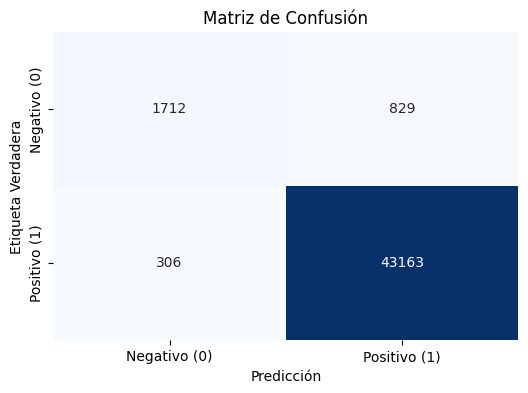

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Definir los parámetros a explorar para la regresión logística
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el GridSearchCV para la regresión logística
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores parámetros: {'C': 10}
Accuracy: 0.9753314496848511

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75      2541
         1.0       0.98      0.99      0.99     43469

    accuracy                           0.98     46010
   macro avg       0.91      0.83      0.87     46010
weighted avg       0.97      0.98      0.97     46010



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


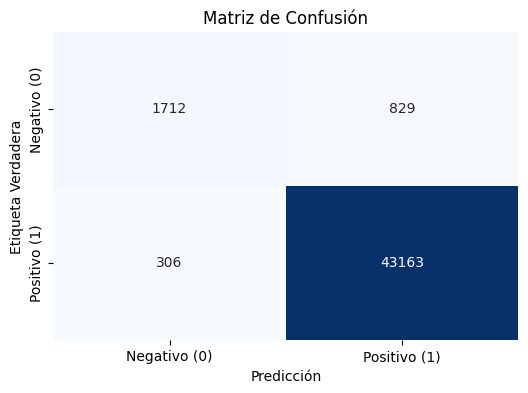

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Reducir el tamaño del conjunto de datos de entrenamiento
X_train_small, _, y_train_small, _ = train_test_split(X_train_tfidf, y_train, test_size=0.1, random_state=42)

# Definir los parámetros a explorar para la regresión logística
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Inicializar GridSearchCV para la regresión logística
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda en el conjunto de datos de entrenamiento reducido
grid_search.fit(X_train_small, y_train_small)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo en todo el conjunto de datos de entrenamiento
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      2541
         1.0       0.98      0.99      0.99     43469

    accuracy                           0.98     46010
   macro avg       0.91      0.84      0.87     46010
weighted avg       0.97      0.98      0.97     46010



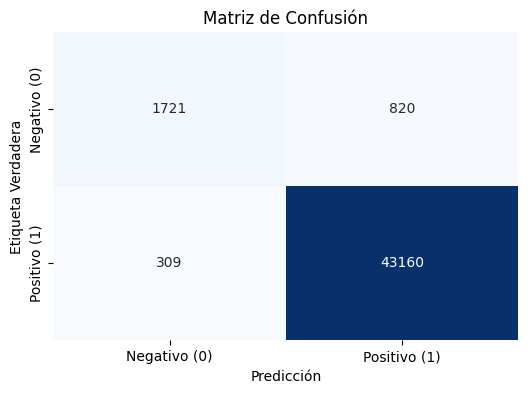

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
# Crear una lista de nombres de variables originales del DataFrame de entrenamiento
original_variables = tfidf_vectorizer.get_feature_names_out()

# Extraer los coeficientes del estimador de regresión logística
model_coefficients = logistic_regression_model.coef_[0]

# Crear un DataFrame de las variables y coeficientes
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})


# Obtener el top 20 de variables positivas
top_positive_variables = coefficient_df.nlargest(20, "Coefficient")

# Obtener el top 20 de variables negativas
top_negative_variables = coefficient_df.nsmallest(20, "Coefficient")

# Imprimir los resultados
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)


Top 20 Positive Variables:
           Variable  Coefficient
45339     excelente    13.167461
57664     increíble     6.044484
40378       encantó     5.906903
17491          buen     5.887449
51637       gracias     5.280440
37873          duda     5.233763
32468     delicioso     5.214588
72217           muy     5.152563
45362    excelentes     4.681763
32451     deliciosa     4.597055
50732        genial     4.443444
15782          bien     4.231853
17495         buena     4.214202
79727      perfecto     4.191699
54222       hermoso     4.130410
43518  espectacular     4.086094
36508   disfrutamos     4.046620
96493       siempre     3.923939
67092   maravilloso     3.752940
47260    fantástico     3.645401

Top 20 Negative Variables:
             Variable  Coefficient
66197            mala    -9.877491
79353            peor    -9.535571
73657              no    -9.172373
85914          pésimo    -8.150253
55200        horrible    -8.036814
66195             mal    -7.728343
85911 

In [4]:
#Programa para quietar las StopWords
# Importar las bibliotecas necesarias
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")
contador_llamadas = 0

def mostrar_arboles(text):
    global contador_llamadas
    """
    Muestra el árbol sintáctico de la frase original y luego el de la frase
    sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.

    Parámetros:
    - text (str): La frase de entrada.

    Retorno:
    - str: La frase sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.
    """
    # Analizar la frase original
    doc = nlp(text.lower())  # Convertir el texto a minúsculas desde el inicio

    # Filtrar palabras que no son preposiciones, artículos, conjunciones, pronombres, 'de' ni 'que'
    filtered_words = [
        token for token in doc
        if token.pos_ not in {"ADP", "DET", "CCONJ", "SCONJ", "PRON"} and token.text not in {"de", "que"}
    ]

    # Reconstruir la frase sin estas palabras
    filtered_sentence = " ".join([token.text for token in filtered_words])

    # Crear un nuevo Doc a partir de las palabras filtradas (aunque no es necesario crear otro Doc)
    filtered_doc = nlp(filtered_sentence)

    # Incrementar contador de llamadas
    contador_llamadas += 1
    print(f"Llamadas a mostrar_arboles: {contador_llamadas}")

    return filtered_sentence


X_train = train_data['Review'].astype(str)
X_test = test_data['Review'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['Polarity']
y_test = test_data['Polarity']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
#Aplicacion del modelo LIME
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Paso 1: Configurar el explicador de LIME
explainer = LimeTextExplainer(class_names=["Negativo", "Positivo"])  # Ajusta según tus clases

# Paso 2: Seleccionar una instancia de prueba para analizar
idx = 0  # Cambia el índice según el texto que quieras analizar

print("Texto seleccionado para análisis:")
print(sample_text)

# Paso 3: Crear una función de predicción para LIME
def predict_proba_lime(texts):
    transformed_texts = tfidf_vectorizer.transform(texts)
    return logistic_regression_model.predict_proba(transformed_texts)



# Paso 4: Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    sample_text,
    predict_proba_lime,
    num_features=5  # Número de palabras más importantes
)

# Paso 5: Mostrar resultados de la explicación
print("\nPalabras más importantes para la predicción:")
for word, weight in exp.as_list():
    print(f"{word}: {weight:.2f}")

# Paso 6: Visualización de la explicación
exp.show_in_notebook(text=True)  # Muestra una visualización en Jupyter Notebook

# (Opcional) Guardar la explicación en HTML para compartir
exp.save_to_file("lime_explanation.html")
print("\nLa explicación se ha guardado como 'lime_explanation.html'.")

# Paso 7: Gráfica de las palabras más importantes (opcional)
fig = exp.as_pyplot_figure()
plt.title(f"Explicación para la instancia {idx}")
plt.show()

In [ ]:
#Aplicacion de nuestro modelo de explicabilidad
def analyze_word_importance_lime(text):
    # Obtener la predicción de la probabilidad del texto original
    original_probs = predict_proba_lime([text])[0]
    original_class = np.argmax(original_probs)
    print(f"Texto original: '{text}'")
    print(f"Predicción original: Clase {original_class}, Probabilidades {original_probs}")

    # Tokenizar el texto en palabras individuales
    tokens = text.split()
    word_importance = []

    # Perturbar el texto eliminando una palabra a la vez
    for i, token in enumerate(tokens):
        # Crear un texto nuevo sin el token actual
        perturbed_tokens = tokens[:i] + tokens[i+1:]
        perturbed_text = " ".join(perturbed_tokens)

        # Obtener la predicción del texto perturbado
        perturbed_probs = predict_proba_lime([perturbed_text])[0]
        perturbed_class = np.argmax(perturbed_probs)

        # Calcular el cambio en la probabilidad para la clase original
        prob_change = original_probs[original_class] - perturbed_probs[original_class]
        # Guardar el resultado
        word_importance.append((token, prob_change, perturbed_class))
        print(f"Sin '{token}': Clase {perturbed_class}, Probabilidades {perturbed_probs}, Cambio en probabilidad de clase original: {prob_change}")

    # Ordenar las palabras por importancia en la probabilidad de la clase original
    word_importance = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)
    print("\nPalabras ordenadas por impacto en la predicción de la clase original:")
    for token, change, new_class in word_importance:
        print(f"Palabra '{token}': Cambio en probabilidad de clase original {change:.4f}, Nueva clase: {new_class}")

# Ejemplo de uso
text_example = "Originalmente yo era fanático de Tenacious D por su primer álbum y escuché algunas canciones pero quedé bastante decepcionado."
analyze_word_importance_lime(text_example)

##Codigo para TASS


In [ ]:

# Convertir las columnas 'Review' a cadenas
X_train = train_data['content'].astype(str)
X_test = test_data['content'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment_valueBinarizado']
y_test = test_data['sentiment_valueBinarizado']


# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
##lema
# Convertir las columnas 'Review' a cadenas
X_train = train_data['lemma'].astype(str)
X_test = test_data['lemma'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment_valueBinarizado']
y_test = test_data['sentiment_valueBinarizado']


# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos de entrenamiento y transformar los datos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.7761341222879684

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74       450
         1.0       0.78      0.83      0.81       564

    accuracy                           0.78      1014
   macro avg       0.78      0.77      0.77      1014
weighted avg       0.78      0.78      0.77      1014



In [ ]:
# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7652859960552268

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.62      0.70       450
         1.0       0.74      0.88      0.81       564

    accuracy                           0.77      1014
   macro avg       0.78      0.75      0.75      1014
weighted avg       0.77      0.77      0.76      1014



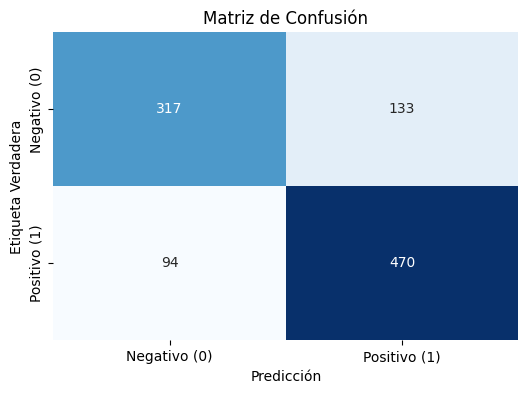

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


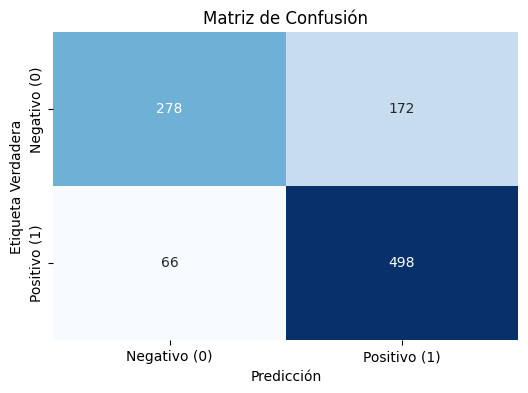

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Reducir el tamaño del conjunto de datos de entrenamiento
X_train_small, _, y_train_small, _ = train_test_split(X_train_tfidf, y_train, test_size=0.1, random_state=42)

# Definir los parámetros a explorar para la regresión logística
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga', 'lbfgs', 'newton-cg']

}


# Inicializar GridSearchCV para la regresión logística
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda en el conjunto de datos de entrenamiento reducido
grid_search.fit(X_train_small, y_train_small)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo en todo el conjunto de datos de entrenamiento
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
print("\nClassification Report:")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Mejores parámetros: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       450
         1.0       0.79      0.82      0.80       564

    accuracy                           0.78      1014
   macro avg       0.77      0.77      0.77      1014
weighted avg       0.77      0.78      0.77      1014



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


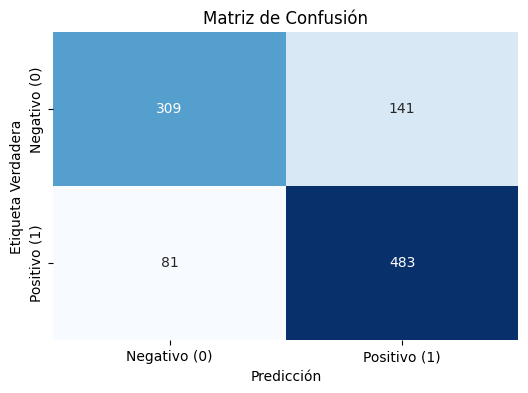

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

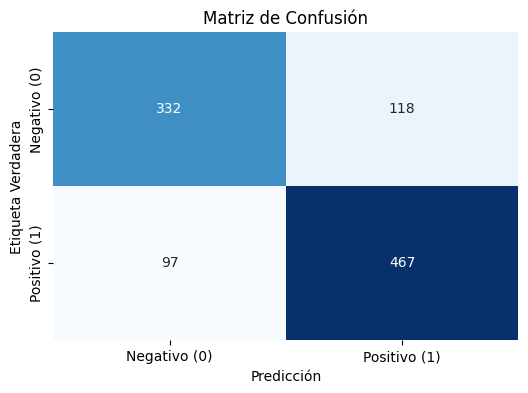

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Definir los parámetros a explorar para la regresión logística
param_grid_1 = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga', 'lbfgs', 'newton-cg']
}


# Inicializar el GridSearchCV para la regresión logística
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo
best_model.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
predictions = best_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejores parámetros: {'C': 10}
Accuracy: 0.7879684418145957

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76       450
         1.0       0.80      0.83      0.81       564

    accuracy                           0.79      1014
   macro avg       0.79      0.78      0.78      1014
weighted avg       0.79      0.79      0.79      1014



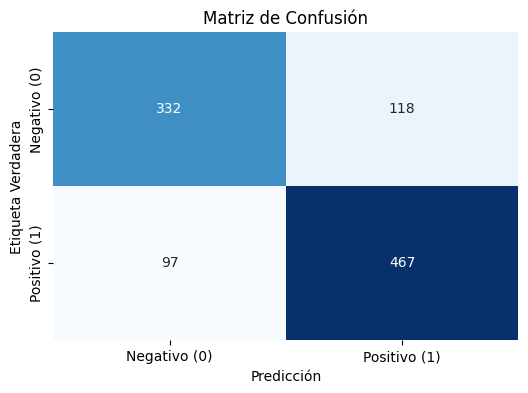

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
# Crear una lista de nombres de variables originales del DataFrame de entrenamiento
original_variables = tfidf_vectorizer.get_feature_names_out()

# Extraer los coeficientes del estimador de regresión logística
model_coefficients = logistic_regression_model.coef_[0]

# Crear un DataFrame de las variables y coeficientes
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})


# Obtener el top 20 de variables positivas
top_positive_variables = coefficient_df.nlargest(20, "Coefficient")

# Obtener el top 20 de variables negativas
top_negative_variables = coefficient_df.nsmallest(20, "Coefficient")

# Imprimir los resultados
print("\nTop 20 Positive Variables:")
print(top_positive_variables)

print("\nTop 20 Negative Variables:")
print(top_negative_variables)


Top 20 Positive Variables:
            Variable  Coefficient
5338         gracias     3.807034
1934            buen     2.924315
4791           feliz     2.481598
8038           noche     2.250975
4200     enhorabuena     2.229762
4818              ff     2.151360
5333          gracia     2.150320
909    alejandrosanz     1.930256
4150        encantar     1.892382
10082             rt     1.846183
2866            cont     1.779308
4774       felicidad     1.768050
1728            beso     1.759120
4287          equipo     1.653748
8109           nuevo     1.645535
1942           bueno     1.637971
7438           mejor     1.607887
1024           amigo     1.536960
7792           mucho     1.529979
1752            bien     1.517306

Top 20 Negative Variables:
         Variable  Coefficient
3872      déficit    -2.621230
9684      recorte    -2.351596
8433        pagar    -2.168633
2226         caso    -1.888581
5705       huelga    -1.793055
3386    denunciar    -1.577331
9338         

In [1]:
#Programa para quietar las StopWords
# Importar las bibliotecas necesarias
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")
contador_llamadas = 0

def mostrar_arboles(text):
    global contador_llamadas
    """
    Muestra el árbol sintáctico de la frase original y luego el de la frase
    sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.

    Parámetros:
    - text (str): La frase de entrada.

    Retorno:
    - str: La frase sin preposiciones, artículos, conjunciones, pronombres, 'de' y 'que'.
    """
    # Analizar la frase original
    doc = nlp(text.lower())  # Convertir el texto a minúsculas desde el inicio

    # Filtrar palabras que no son preposiciones, artículos, conjunciones, pronombres, 'de' ni 'que'
    filtered_words = [
        token for token in doc
        if token.pos_ not in {"ADP", "DET", "CCONJ", "SCONJ", "PRON"} and token.text not in {"de", "que"}
    ]

    # Reconstruir la frase sin estas palabras
    filtered_sentence = " ".join([token.text for token in filtered_words])

    # Crear un nuevo Doc a partir de las palabras filtradas (aunque no es necesario crear otro Doc)
    filtered_doc = nlp(filtered_sentence)

    # Incrementar contador de llamadas
    contador_llamadas += 1
    print(f"Llamadas a mostrar_arboles: {contador_llamadas}")

    return filtered_sentence

# Convertir las columnas 'Review' a cadenas
X_train = train_data['content'].astype(str)
X_test = test_data['content'].astype(str)

# Extraer las etiquetas de polaridad
y_train = train_data['sentiment_valueBinarizado']
y_test = test_data['sentiment_valueBinarizado']

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Ajustar el vectorizador al conjunto de entrenamiento y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transformar los datos de prueba utilizando el vectorizador ya ajustado
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Definir etiquetas personalizadas para los ejes
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo (0)", "Positivo (1)"])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
#Aplicacion del modelo LIME
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Paso 1: Configurar el explicador de LIME
explainer = LimeTextExplainer(class_names=["Negativo", "Positivo"])  # Ajusta según tus clases

# Paso 2: Seleccionar una instancia de prueba para analizar
idx = 0  # Cambia el índice según el texto que quieras analizar

print("Texto seleccionado para análisis:")
print(sample_text)

# Paso 3: Crear una función de predicción para LIME
def predict_proba_lime(texts):
    transformed_texts = tfidf_vectorizer.transform(texts)
    return logistic_regression_model.predict_proba(transformed_texts)



# Paso 4: Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    sample_text,
    predict_proba_lime,
    num_features=5  # Número de palabras más importantes
)

# Paso 5: Mostrar resultados de la explicación
print("\nPalabras más importantes para la predicción:")
for word, weight in exp.as_list():
    print(f"{word}: {weight:.2f}")

# Paso 6: Visualización de la explicación
exp.show_in_notebook(text=True)  # Muestra una visualización en Jupyter Notebook

# (Opcional) Guardar la explicación en HTML para compartir
exp.save_to_file("lime_explanation.html")
print("\nLa explicación se ha guardado como 'lime_explanation.html'.")

# Paso 7: Gráfica de las palabras más importantes (opcional)
fig = exp.as_pyplot_figure()
plt.title(f"Explicación para la instancia {idx}")
plt.show()

ModuleNotFoundError: No module named 'lime'

In [3]:
#Aplicacion de nuestro modelo de explicabilidad
def analyze_word_importance_lime(text):
    # Obtener la predicción de la probabilidad del texto original
    original_probs = predict_proba_lime([text])[0]
    original_class = np.argmax(original_probs)
    print(f"Texto original: '{text}'")
    print(f"Predicción original: Clase {original_class}, Probabilidades {original_probs}")

    # Tokenizar el texto en palabras individuales
    tokens = text.split()
    word_importance = []

    # Perturbar el texto eliminando una palabra a la vez
    for i, token in enumerate(tokens):
        # Crear un texto nuevo sin el token actual
        perturbed_tokens = tokens[:i] + tokens[i+1:]
        perturbed_text = " ".join(perturbed_tokens)

        # Obtener la predicción del texto perturbado
        perturbed_probs = predict_proba_lime([perturbed_text])[0]
        perturbed_class = np.argmax(perturbed_probs)

        # Calcular el cambio en la probabilidad para la clase original
        prob_change = original_probs[original_class] - perturbed_probs[original_class]
        # Guardar el resultado
        word_importance.append((token, prob_change, perturbed_class))
        print(f"Sin '{token}': Clase {perturbed_class}, Probabilidades {perturbed_probs}, Cambio en probabilidad de clase original: {prob_change}")

    # Ordenar las palabras por importancia en la probabilidad de la clase original
    word_importance = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)
    print("\nPalabras ordenadas por impacto en la predicción de la clase original:")
    for token, change, new_class in word_importance:
        print(f"Palabra '{token}': Cambio en probabilidad de clase original {change:.4f}, Nueva clase: {new_class}")

# Ejemplo de uso
text_example = "Originalmente yo era fanático de Tenacious D por su primer álbum y escuché algunas canciones pero quedé bastante decepcionado."
analyze_word_importance_lime(text_example)

NameError: name 'predict_proba_lime' is not defined